# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Get BTC & ETH JSON responses
btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()
btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19079175,
   'total_supply': 19079175,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 20804.0,
     'volume_24h': 18011422268,
     'market_cap': 396856779669,
     'percentage_change_1h': 0.111500101666589,
     'percentage_change_24h': -1.86204789211238,
     'percentage_change_7d': 0.81099186835254,
     'percent_change_1h': 0.111500101666589,
     'percent_change_24h': -1.86204789211238,
     'percent_change_7d': 0.81099186835254},
    'CAD': {'price': 26745.6224,
     'volume_24h': 23155484467.7408,
     'market_cap': 510199075942.466,
     'percent_change_1h': 0.111500101666589,
     'percent_change_24h': -1.86204789211238,
     'percent_change_7d': 0.81099186835254}},
   'last_updated': 1656396628}},
 'metadata': {'timestamp': 1656396628,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [6]:
# Fetch current BTC price
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $32094.75
The current value of your 5.3 ETH is $8106.44


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.to_datetime("2022-06-27").date().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
prices = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

prices.set_index('symbol', inplace=True)
prices

,open,high,low,close,volume,trade_count,vwap
symbol,,,,,,,
AGG,100.68,100.945,100.475,100.60,8262512,33194,100.694460
SPY,391.12,391.360,387.440,388.59,65967268,552197,389.085434


In [10]:
# Pick AGG and SPY close prices
agg_close_price = prices.loc['AGG']['close']
spy_close_price = prices.loc['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.6
Current SPY closing price: $388.59


In [11]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19429.50
The current value of your 200 AGG shares is $20120.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame({None: ['crypto', 'shares'],
                           'amount': [crypto_value, shares_value]}).set_index(None)

# Display savings DataFrame
display(df_savings)

,amount
crypto,40201.186386
shares,39549.500000


<AxesSubplot:ylabel='amount'>

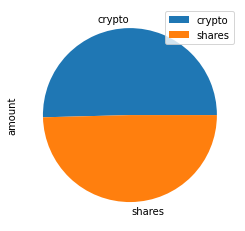

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(df_savings['amount'])

# Validate saving health
if emergency_fund < total_savings:
    print('Congratulations, your portfolio values exceeds your savings goal!')
elif emergency_fund == total_savings:
    print('Congratulations, your portfolio values matches your savings goal!')
else:
    print(f'You are ${emergency_fund-total_savings} away from reaching your savings goal!')

Congratulations, your portfolio values exceeds your savings goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = (pd.Timestamp('2022-06-27') - pd.DateOffset(years=5)).date().isoformat()
end_date = pd.Timestamp('2022-06-27').date().isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame and separate ticker data
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY,AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()

SPY                                       \
                             open     high      low   close     volume   
timestamp                                                                
2017-06-27 04:00:00+00:00  243.01  243.380  241.310  241.33   82247666   
2017-06-28 04:00:00+00:00  242.51  243.715  242.230  243.49   70042599   
2017-06-29 04:00:00+00:00  243.62  243.720  239.955  241.35  106949719   
2017-06-30 04:00:00+00:00  242.30  242.710  241.575  241.80   86820694   
2017-07-03 04:00:00+00:00  242.90  243.380  242.210  242.21   39153806   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2017-06-27 04:00:00+00:00      270664  242.289384  109.93  109.9800  109.7901   
2017-06-28 04:00:00+00:00      224934  243.068322  109.85  109.8800  109.6800   
2017-06-29 04:00:00+00:00      395288  241.730427  109.53  109.6800  109.4650   
2017-06-30 04:00:00+00:00      241580  242.015951  109.62  109.6273  109.4600   
2017-07-03 04:00:00+00:00      134045  242.802969  109.30  109.3000  109.0100   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-06-27 04:00:00+00:00  109.82   3072302       11545  109.865556  
2017-06-28 04:00:00+00:00  109.86  12184475        9789  109.871051  
2017-06-29 04:00:00+00:00  109.65   3377194       12108  109.620298  
2017-06-30 04:00:00+00:00  109.51   2626939       10668  109.546443  
2017-07-03 04:00:00+00:00  109.09   1817281        7321  109.130388

In [34]:
# Configuring a Monte Carlo simulation to simulate 500 runs of 30 years cumulative returns
MC_30yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [35]:
# Print the simulation input data
MC_30yr.portfolio_data.head()

SPY                                       \
                             open     high      low   close     volume   
timestamp                                                                
2017-06-27 04:00:00+00:00  243.01  243.380  241.310  241.33   82247666   
2017-06-28 04:00:00+00:00  242.51  243.715  242.230  243.49   70042599   
2017-06-29 04:00:00+00:00  243.62  243.720  239.955  241.35  106949719   
2017-06-30 04:00:00+00:00  242.30  242.710  241.575  241.80   86820694   
2017-07-03 04:00:00+00:00  242.90  243.380  242.210  242.21   39153806   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-27 04:00:00+00:00      270664  242.289384          NaN  109.93   
2017-06-28 04:00:00+00:00      224934  243.068322     0.008950  109.85   
2017-06-29 04:00:00+00:00      395288  241.730427    -0.008789  109.53   
2017-06-30 04:00:00+00:00      241580  242.015951     0.001865  109.62   
2017-07-03 04:00:00+00:00      134045  242.802969     0.001696  109.30   

                                                                             \
                               high       low   close    volume trade_count   
timestamp                                                                     
2017-06-27 04:00:00+00:00  109.9800  109.7901  109.82   3072302       11545   
2017-06-28 04:00:00+00:00  109.8800  109.6800  109.86  12184475        9789   
2017-06-29 04:00:00+00:00  109.6800  109.4650  109.65   3377194       12108   
2017-06-30 04:00:00+00:00  109.6273  109.4600  109.51   2626939       10668   
2017-07-03 04:00:00+00:00  109.3000  109.0100  109.09   1817281        7321   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-27 04:00:00+00:00  109.865556          NaN  
2017-06-28 04:00:00+00:00  109.871051     0.000364  
2017-06-29 04:00:00+00:00  109.620298    -0.001912  
2017-06-30 04:00:00+00:00  109.546443    -0.001277  
2017-07-03 04:00:00+00:00  109.130388    -0.003835

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\btang\Documents\Bootcamp\hwk5\fintech_hwk5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015026,0.997940,1.003565,0.996966,0.989819,1.007642,0.999626,1.008549,1.009111,1.000769,...,0.987670,0.993310,1.005123,0.993742,1.014598,0.995894,1.006051,0.991639,1.005386,1.002694
2,1.011726,0.990460,1.013983,1.002547,0.991125,1.019895,0.998802,0.990806,1.005988,1.005278,...,0.983694,0.995154,0.996014,0.985643,1.017478,0.983977,0.991447,0.978032,1.001538,1.000709
3,0.998487,0.987018,1.018135,1.008852,0.984520,1.028010,0.991118,0.990111,1.003604,1.008261,...,0.997574,0.981164,0.993557,0.980138,1.022045,0.998572,1.001708,0.981404,0.992975,0.987898
4,0.987416,0.997555,1.018689,1.010515,0.986167,1.026830,1.001705,0.991582,1.007016,0.998406,...,0.989945,0.977978,0.985882,0.971042,1.024320,0.991188,0.991268,0.985102,0.989590,0.989643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.186519,2.113688,1.106876,17.225895,4.557175,4.661873,1.052178,10.652902,1.465210,1.221347,...,4.624525,2.741637,8.673247,3.921604,7.160233,1.715809,8.791506,10.343199,6.128596,20.441119
7557,6.231614,2.110684,1.112478,17.048954,4.575545,4.721208,1.054036,10.465824,1.464020,1.220558,...,4.616360,2.771747,8.636350,3.925062,7.130663,1.711713,8.675654,10.393018,6.176348,20.245269
7558,6.199767,2.065707,1.114680,16.793959,4.576279,4.773413,1.062605,10.438118,1.464887,1.230257,...,4.638407,2.750976,8.702693,3.950695,7.243476,1.715719,8.748095,10.473224,6.129812,20.603979
7559,6.230023,2.074955,1.100953,16.987475,4.573662,4.721522,1.063555,10.454271,1.476978,1.225921,...,4.692794,2.748105,8.748156,3.932226,7.212220,1.690979,8.761812,10.553507,6.177288,20.779692


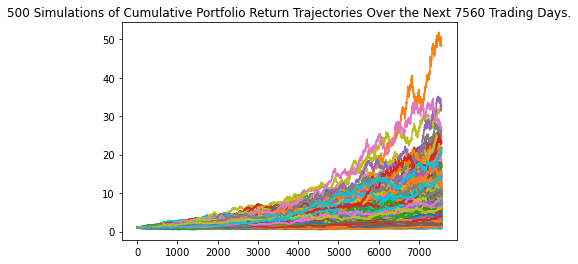

In [38]:
# Plot simulation outcomes
line_plot = MC_30yr.plot_simulation()

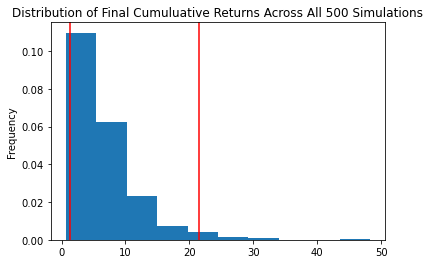

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30yr.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_30yr = MC_30yr.summarize_cumulative_return()

# Print summary statistics
print(stats_30yr)

count           500.000000
mean              6.670739
std               5.339556
min               0.664235
25%               3.240233
50%               5.210139
75%               8.505635
max              48.257505
95% CI Lower      1.302240
95% CI Upper     21.463840
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats_30yr[8]*initial_investment,2)
ci_upper = round(stats_30yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26044.81 and $429276.79


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats_30yr[8]*initial_investment,2)
ci_upper = round(stats_30yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $39067.21 and $643915.19


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [49]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\btang\Documents\Bootcamp\hwk5\fintech_hwk5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986780,0.993883,1.000231,1.008638,1.002466,0.997509,0.997729,1.004000,0.992421,0.985567,...,1.010013,1.001931,1.000178,1.009349,0.999319,1.006065,0.997397,1.008055,1.005142,0.993004
2,0.989457,0.996638,1.016085,0.999707,1.004331,1.007583,1.000209,1.004639,0.988586,0.975461,...,1.022806,1.000771,1.015975,1.012665,0.975173,0.993259,0.998410,1.012009,1.018248,1.002617
3,0.965913,0.991603,1.018771,1.009448,1.003932,1.010005,0.992272,1.002125,0.977754,0.975494,...,1.027135,0.994864,1.007450,1.002617,0.957925,1.004605,1.006225,1.002445,1.009268,1.006048
4,0.957789,1.001243,0.988933,1.021614,1.005523,1.018246,1.009051,0.998339,0.991993,0.972811,...,1.041095,0.992446,1.007479,0.990034,0.933347,0.991691,1.008119,1.012589,1.006130,1.010498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.946756,1.436082,1.864387,1.584281,1.191782,1.642356,1.749727,1.567028,1.084503,1.451403,...,1.049183,1.363961,1.122410,1.333713,1.458134,1.874969,1.172109,2.487937,2.601571,1.555336
1257,1.910559,1.442890,1.877422,1.561840,1.211086,1.618900,1.774045,1.597042,1.090395,1.462389,...,1.029825,1.397249,1.118603,1.353060,1.435090,1.842647,1.186373,2.479083,2.621297,1.544647
1258,1.896135,1.453685,1.866800,1.553695,1.208955,1.621349,1.740364,1.607978,1.102089,1.466792,...,1.039819,1.421034,1.125485,1.365426,1.437441,1.850521,1.196571,2.490162,2.646522,1.546279
1259,1.897136,1.446706,1.867143,1.536180,1.211825,1.649344,1.738271,1.610322,1.103348,1.447251,...,1.040180,1.398452,1.120091,1.368859,1.425801,1.883253,1.178680,2.520046,2.681457,1.529031


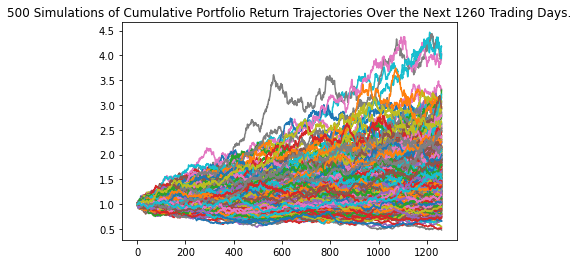

In [50]:
# Plot simulation outcomes
line_plot_5yr = MC_5yr.plot_simulation()

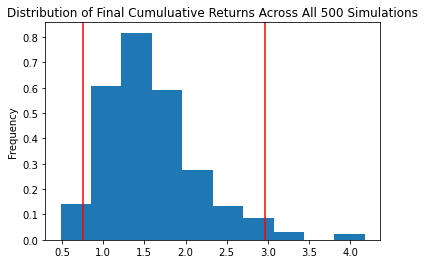

In [51]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = MC_5yr.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_5yr = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(stats_5yr)

count           500.000000
mean              1.586155
std               0.574794
min               0.482327
25%               1.205499
50%               1.482278
75%               1.867610
max               4.176780
95% CI Lower      0.756590
95% CI Upper      2.960242
Name: 1260, dtype: float64


In [53]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stats_5yr[8]*initial_investment,2)
ci_upper_five = round(stats_5yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $45395.42 and $177614.5


### Ten Years Retirement Option

In [54]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [55]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\btang\Documents\Bootcamp\hwk5\fintech_hwk5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997903,1.011403,1.010839,1.009350,1.001168,0.993834,1.008652,0.999061,0.990174,0.997463,...,0.999948,0.981095,0.996377,1.011784,1.004093,0.988292,0.992514,1.020438,0.991154,1.007324
2,0.985386,1.011106,1.006087,1.024706,0.979312,0.997909,0.988426,1.010665,0.997215,0.999393,...,0.993017,0.981471,1.006108,1.023334,0.981787,1.004093,0.992334,1.003555,0.989113,1.013422
3,0.973762,1.009741,1.005276,1.031361,0.963564,0.986837,0.997951,1.002250,0.990456,0.997355,...,0.982175,0.979732,1.015525,1.015646,0.987449,1.013798,0.998766,1.001236,0.991988,0.976760
4,0.965860,1.017936,1.005431,1.032188,0.968931,0.979494,0.995682,1.018815,1.017919,0.985282,...,0.977842,0.975138,1.004073,1.000193,0.975939,1.019701,0.989160,0.995377,0.991490,0.966044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.926083,4.272221,3.241635,2.266736,1.168613,3.084521,2.653173,5.847822,2.564900,1.566211,...,1.597726,1.817875,1.201734,2.613900,5.932907,2.241783,1.101445,2.281290,2.755536,1.816214
2517,1.915716,4.325712,3.175366,2.316631,1.172928,3.059825,2.689813,5.889704,2.557326,1.544851,...,1.574408,1.800653,1.196479,2.663376,5.965463,2.301588,1.103926,2.273235,2.699433,1.783531
2518,1.954060,4.322978,3.147181,2.328488,1.146990,3.023859,2.733953,5.863001,2.544999,1.569737,...,1.587452,1.778469,1.198951,2.656071,5.958199,2.337156,1.115065,2.284639,2.695951,1.799709
2519,1.940767,4.357313,3.113963,2.344650,1.134281,3.026463,2.746955,5.832830,2.576257,1.584950,...,1.603385,1.788768,1.201431,2.660849,5.845318,2.333436,1.126522,2.320134,2.698394,1.811923


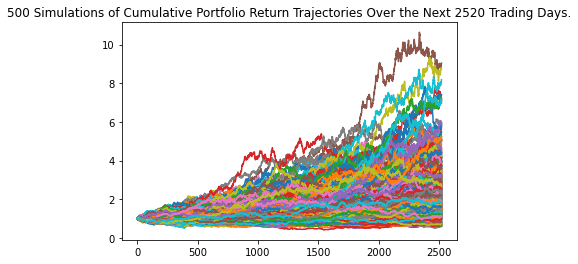

In [56]:
# Plot simulation outcomes
line_plot_10yr = MC_10yr.plot_simulation()

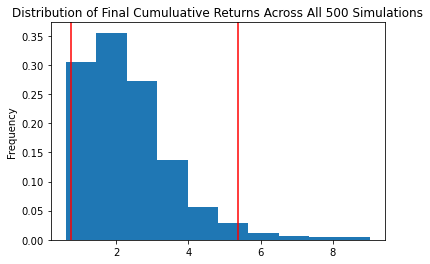

In [57]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = MC_10yr.plot_distribution()

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_10yr = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(stats_10yr)

count           500.000000
mean              2.369969
std               1.279863
min               0.598511
25%               1.406695
50%               2.127127
75%               2.944789
max               9.041547
95% CI Lower      0.731327
95% CI Upper      5.381701
Name: 2520, dtype: float64


In [59]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stats_10yr[8]*initial_investment,2)
ci_upper_ten = round(stats_10yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $43879.62 and $322902.08


30 yrs (60% stocks, 20k initial investment) -> 39,067.21 and 643,915.19 </br>
5 yrs (80% stocks, 60k initial investment) -> 45,395.42 and 177,614.5 </br>
10 yrs (80% stocks, 60k initial investment) -> 43,879.62 and 322,902.08 </br>
</br>
10 years may not be enough to retire. 3 times as much initial investment and a riskier portfolio allocation is not enough to make up for the 20 years of difference in compounding.